#**Week7 - Case Study on Correlation and Regression**

##_A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)_

######***Importing necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


######***Reading dataset Add_sales_data_2018.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


######***Finding the no: of Observations***

In [4]:
df.shape

(205, 7)

##**Insights:**


> _**205** Observations found!_


######***Checking for null values***

In [5]:
df[df.isna().any(axis=1)]

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)


##**Insights:**


> _No Null Values Found!_



######***Plotting a Histogram for all the features in the dataset***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4076c41b10>,
      dtype=object)

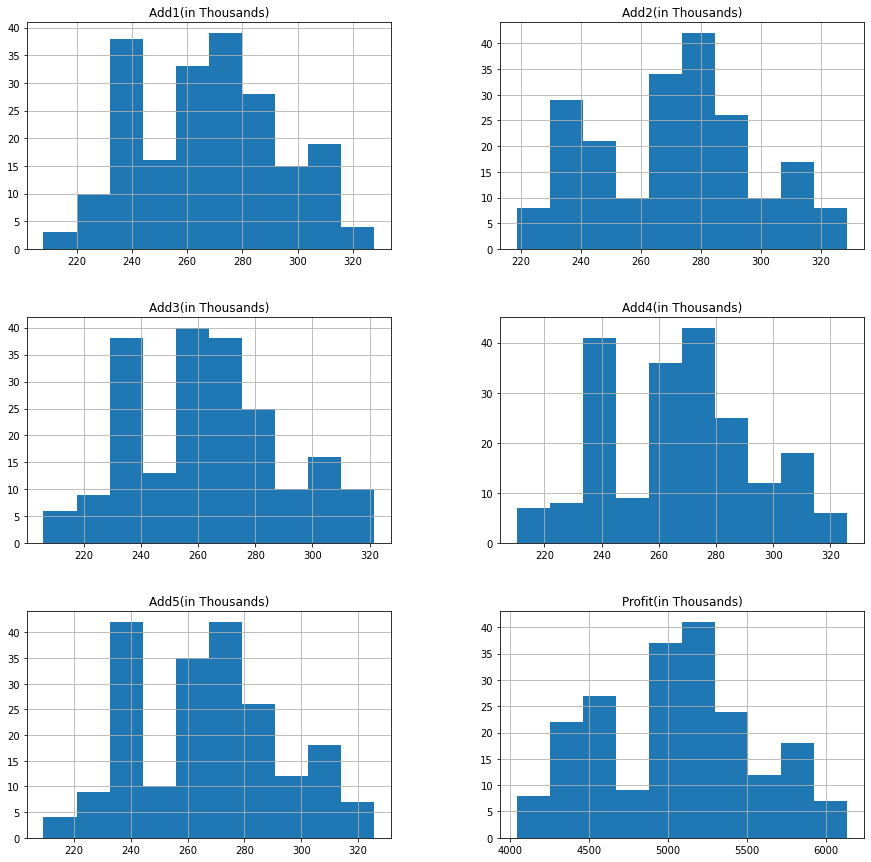

In [6]:
df.hist(figsize=(15, 15)) 

##**1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.**

######***Finding Correlation using corr() and Plotting a heatmap***

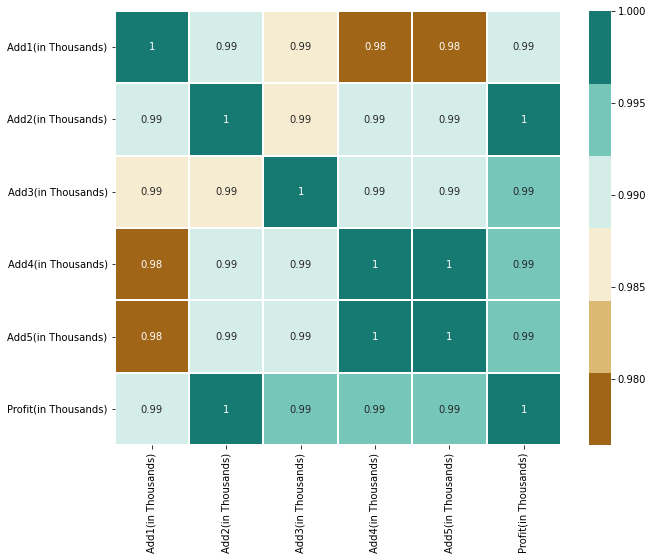

In [7]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,8))
colormap = sns.color_palette("BrBG")
sns.heatmap(corrmatrix, annot=True, linewidth=1, cmap=colormap)

##**Insights:**


> _As visible from the heatmap, the variable **Add2, Add3, Add4** seems to be most correlated with Profit. So let's go ahead and perform simple linear regression using **Add2, Add3, Add4** as our feature variable._



##**2. Build a regression model to predict the profit from the given data and comment your findings on it.**

######***Defining the variable X and y***

In [8]:
X=df[['Add2(in Thousands)', 'Add3(in Thousands)', 'Add4(in Thousands)']]
y=df['Profit(in Thousands)']

######***Importing train_test_split from the sklearn.model_selection library and splitting the data, by keeping 75% of the data in train dataset and the rest 25% in test dataset***

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state=42)
X_train.head()

,Add2(in Thousands),Add3(in Thousands),Add4(in Thousands)
90,262.20,254.65,260.70
173,310.70,304.05,307.70
93,252.35,245.55,250.00
5,235.95,230.20,233.50
167,294.90,278.60,289.55


In [10]:
y_train.head()

90     4887.296
173    5805.521
93     4705.198
5      4404.686
167    5465.277
Name: Profit(in Thousands), dtype: float64

######***Training our model***

In [11]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)

######***Making predictions based on our model***

In [12]:
predictions=model.predict(X_test)
print(predictions)

[4150.32996459 4448.88791867 5128.78042105 4905.7731823  5002.75991809
 4624.5649809  5383.32222259 5328.22517539 5172.5734356  5958.56003899
 5780.6040051  4997.7107687  5075.85425734 5782.55733369 4933.08211946
 5066.65426547 4190.19999427 5033.5895022  5011.16155344 5132.21305211
 5145.93313234 5424.71836425 4570.73622375 4596.01542824 4437.37230023
 4176.14756237 5613.18132394 5665.70967386 4649.66874057 5720.11607126
 5004.05721728 5181.95734057 5016.96924886 5543.02523626 5014.1198734
 5030.76172738 5107.14978108 4758.62007613 4607.6046768  4927.36387947
 5253.72995456 5039.64325335 5490.23906849 5022.07982315 4645.77790277
 4487.30097429 4433.13074874 5304.05630228 5427.22403116 4479.34720119
 4190.46236173 6062.03714001]


In [13]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


######***Model Evaluation by calculating Mean Squared Error (MSE)***

In [14]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error is:', mean_squared_error(y_test, predictions))

Mean Squared Error is: 3.7677178746671234


######***Finding the Intercept and Coefficients***

In [15]:
model.intercept_

-3.227459255672329

In [16]:
model.coef_

array([13.35966847,  4.25037762,  1.17823951])

######***Evaluating the accuracy and efficiency of a model by using R-Squared value***

In [17]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()
print('The R-Squared value:',result.rsquared, '\nThe Adjusted R-Squared Value:',result.rsquared_adj)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The R-Squared value: 0.9999731642713373 
The Adjusted R-Squared Value: 0.9999727637380736


##**Insights:**
*   _The **R-Squared value 0.9999731642713373** shows that the model fits the testing set as well, and we are confident that we can use the model to predict future values._
*   **y = 13.35966847x1 + 4.25037762x2 + 1.17823951x3 - 3.227459255672329** _becomes our Regression Model_






##**3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.**

In [18]:
amount = [[312, 309, 298]]
new_predictions = model.predict(amount)
print("Amount Spent=%s \nPredicted Profit=%s" % (amount[0], new_predictions[0]))

Amount Spent=[312, 309, 298] 
Predicted Profit=5829.471160328531


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


##**Insights:**


> _If the Textile company spent **312, 309, 298** with **Add2, Add3, Add4** then the Predicted Profit thus generated is **5829.471160328531**_

